In [27]:
#! pip install tensorflow-gpu

In [28]:
import tensorflow as tf

In [29]:
print(tf.__version__)

2.9.1


In [30]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
# Dataset

dataset = pd.read_csv("/content/drive/MyDrive/Data Science Work Space/Deep Learning/Churn_Modelling.csv")

In [32]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [33]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [34]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [35]:
# Create Dummy Variables

Geography=pd.get_dummies(X["Geography"],drop_first=True)
Gender=pd.get_dummies(X["Gender"],drop_first=True)

In [36]:
X=pd.concat([X,Gender,Geography],axis=1)

In [37]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1


In [38]:
X.drop(['Gender','Geography'],axis=1,inplace=True)

In [39]:
# Split the dataset

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [40]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [41]:
# ANN

from tensorflow.keras.models import Sequential            # For executing in sequential order ---> Input,Hidden,Output
from tensorflow.keras.layers import Dense                 # For creating each Neurons
from tensorflow.keras.layers import ReLU,LeakyReLU
from tensorflow.keras.layers import Dropout

In [42]:
# Initialising the ANN

classifier = Sequential()

In [43]:
# Adding input layer

classifier.add(Dense(units=11,activation="relu"))       # Units is the numper of columns and it is mandatory to give any activation function here itself.

In [44]:
# Creating Hidden Layer 1

classifier.add(Dense(units=6,activation="relu")) 

In [45]:
# Creating Hidden Layer 2

classifier.add(Dense(units=4,activation="relu")) 

In [46]:
# Creating Output Layer

classifier.add(Dense(units=1,activation="sigmoid"))

In [47]:
# Complie

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# This is for forward and backward propagation.

In [48]:
model_history = classifier.fit(X_train_sc,y_train,validation_split=0.33,batch_size=10,epochs=30)

# validation_split has the same use as cross validation, here 67% will go for train and 33% will go for validation.

Epoch 1/30
536/536 [==============================] - 3s 4ms/step - loss: 0.6034 - accuracy: 0.6798 - val_loss: 0.4568 - val_accuracy: 0.8103
Epoch 2/30
536/536 [==============================] - 2s 4ms/step - loss: 0.4393 - accuracy: 0.8138 - val_loss: 0.4175 - val_accuracy: 0.8175
Epoch 3/30
536/536 [==============================] - 2s 4ms/step - loss: 0.4070 - accuracy: 0.8287 - val_loss: 0.3973 - val_accuracy: 0.8266
Epoch 4/30
536/536 [==============================] - 2s 4ms/step - loss: 0.3779 - accuracy: 0.8438 - val_loss: 0.3712 - val_accuracy: 0.8459
Epoch 5/30
536/536 [==============================] - 2s 4ms/step - loss: 0.3606 - accuracy: 0.8546 - val_loss: 0.3629 - val_accuracy: 0.8527
Epoch 6/30
536/536 [==============================] - 2s 4ms/step - loss: 0.3537 - accuracy: 0.8574 - val_loss: 0.3584 - val_accuracy: 0.8523
Epoch 7/30
536/536 [==============================] - 3s 5ms/step - loss: 0.3493 - accuracy: 0.8582 - val_loss: 0.3541 - val_accuracy: 0.8535
Epoch 

In [49]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

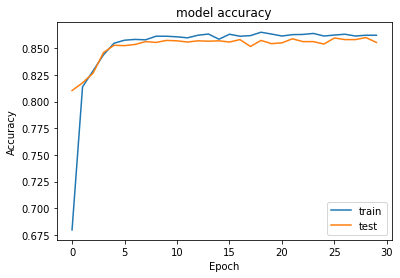

In [50]:
# Summarize History - Accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'])
plt.show()

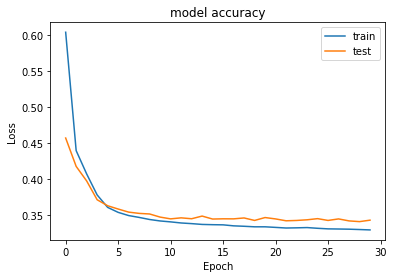

In [51]:
# Summarize History - Loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','test'])
plt.show()

In [56]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

# https://keras.io/api/callbacks/early_stopping/

In [58]:
model_history = classifier.fit(X_train_sc,y_train,validation_split=0.33,batch_size=10,epochs=30,callbacks=early_stopping)

Epoch 1/30
536/536 [==============================] - 2s 4ms/step - loss: 0.3207 - accuracy: 0.8658 - val_loss: 0.3423 - val_accuracy: 0.8644
Epoch 2/30
536/536 [==============================] - 2s 4ms/step - loss: 0.3206 - accuracy: 0.8640 - val_loss: 0.3417 - val_accuracy: 0.8626
Epoch 3/30
536/536 [==============================] - 2s 4ms/step - loss: 0.3203 - accuracy: 0.8679 - val_loss: 0.3412 - val_accuracy: 0.8607
Epoch 4/30
536/536 [==============================] - 2s 4ms/step - loss: 0.3210 - accuracy: 0.8647 - val_loss: 0.3431 - val_accuracy: 0.8591
Epoch 5/30
536/536 [==============================] - 2s 4ms/step - loss: 0.3204 - accuracy: 0.8660 - val_loss: 0.3395 - val_accuracy: 0.8618
Epoch 6/30
536/536 [==============================] - 2s 4ms/step - loss: 0.3202 - accuracy: 0.8660 - val_loss: 0.3419 - val_accuracy: 0.8618
Epoch 7/30
536/536 [==============================] - 2s 4ms/step - loss: 0.3199 - accuracy: 0.8653 - val_loss: 0.3396 - val_accuracy: 0.8629
Epoch 